In [ ]:
'''
#EDA 자동화
1. df_train, df_test: train, test 데이터 입력
2. 원하는 경로 설정
3. 컬럼별 상관계수 시각화 레포트 생성
'''
import sweetviz
report=sweetviz.compare([df_train,'Train'],[df_test,'Test'],'amount')
report.show_html('C:\\Users\\user\\Downloads\\sun_report.html')


In [1]:
'''
다중공선성(multicollinearity): 하나의 독립변수가 다른 여러 개의 독립변수들로 잘 예측되는 경우
- 다중공선성이 있으면 데이터 분석의 방해 요소
- 분산팽창계수(VIF, Variance Inflation Factor)를 구하여 판단
- 명확한 기준은 없으나 보통 10보다 크면 다중공선성이 있다고 판단(5를 기준으로 하기도 함)
1. df 설정
'''
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i)
                         for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif

df=pd.read_csv('C:\\Users\\user\\Desktop\\VS code\\test\\태양광 대회\\api_data\\train_20221115.csv')
X_train = df

vif = feature_engineering_XbyVIF(X_train)
print(vif)

KeyboardInterrupt: 

<AxesSubplot: >

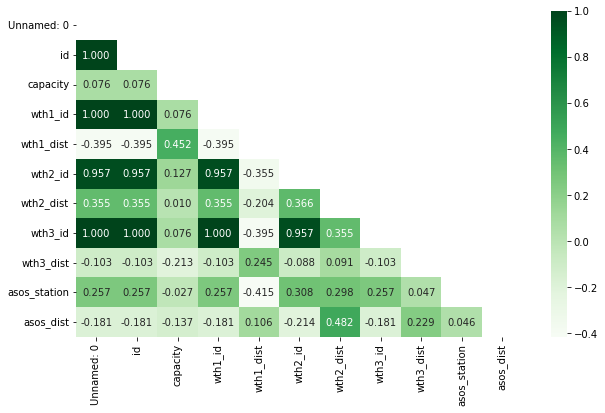

In [6]:
'''
상관계수 및 heatmap
상관계수(correlation coefficient): 두 변수가 함께 변하는 정도를 -1 ~ 1 범위의 수로 나타낸 것

사용법
1. df 데이터 대입
2. 원하는 버전 사용
3. 옵션 골라서 사용
'''

import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('C:\\Users\\user\\Desktop\\VS code\\test\\태양광 대회\\api_data\\pv_sites.csv')

'''
version 1. 사각형
'''
#사이즈 설정
fig, ax = plt.subplots(figsize=(20, 20))
sb.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

'''
version 2. 대각선 아래
'''
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.rcParams["figure.figsize"] = (10,6) # 그림 크기 조정
sb.heatmap(data = df.corr(), mask=mask, annot=True, fmt = '.3f', linewidths=0, cmap='Greens')

'''
옵션

제목설정
title = 'CORRELATION MATRIX\n'
plt.title(title, loc='left', fontsize=15)
'''

In [8]:
'''
데이터 시각화 세팅
'''
import pandas as pd
import matplotlib.pyplot as plt  # pyplot 만 가져와서 plt로 부를게
import seaborn as sns
 
from matplotlib import rc
plt.rc('font', family='Malgun Gothic') ## 한글 폰트 설정
#주피터에서만 활성화
%matplotlib inline

plt.rcParams["axes.unicode_minus"] = False

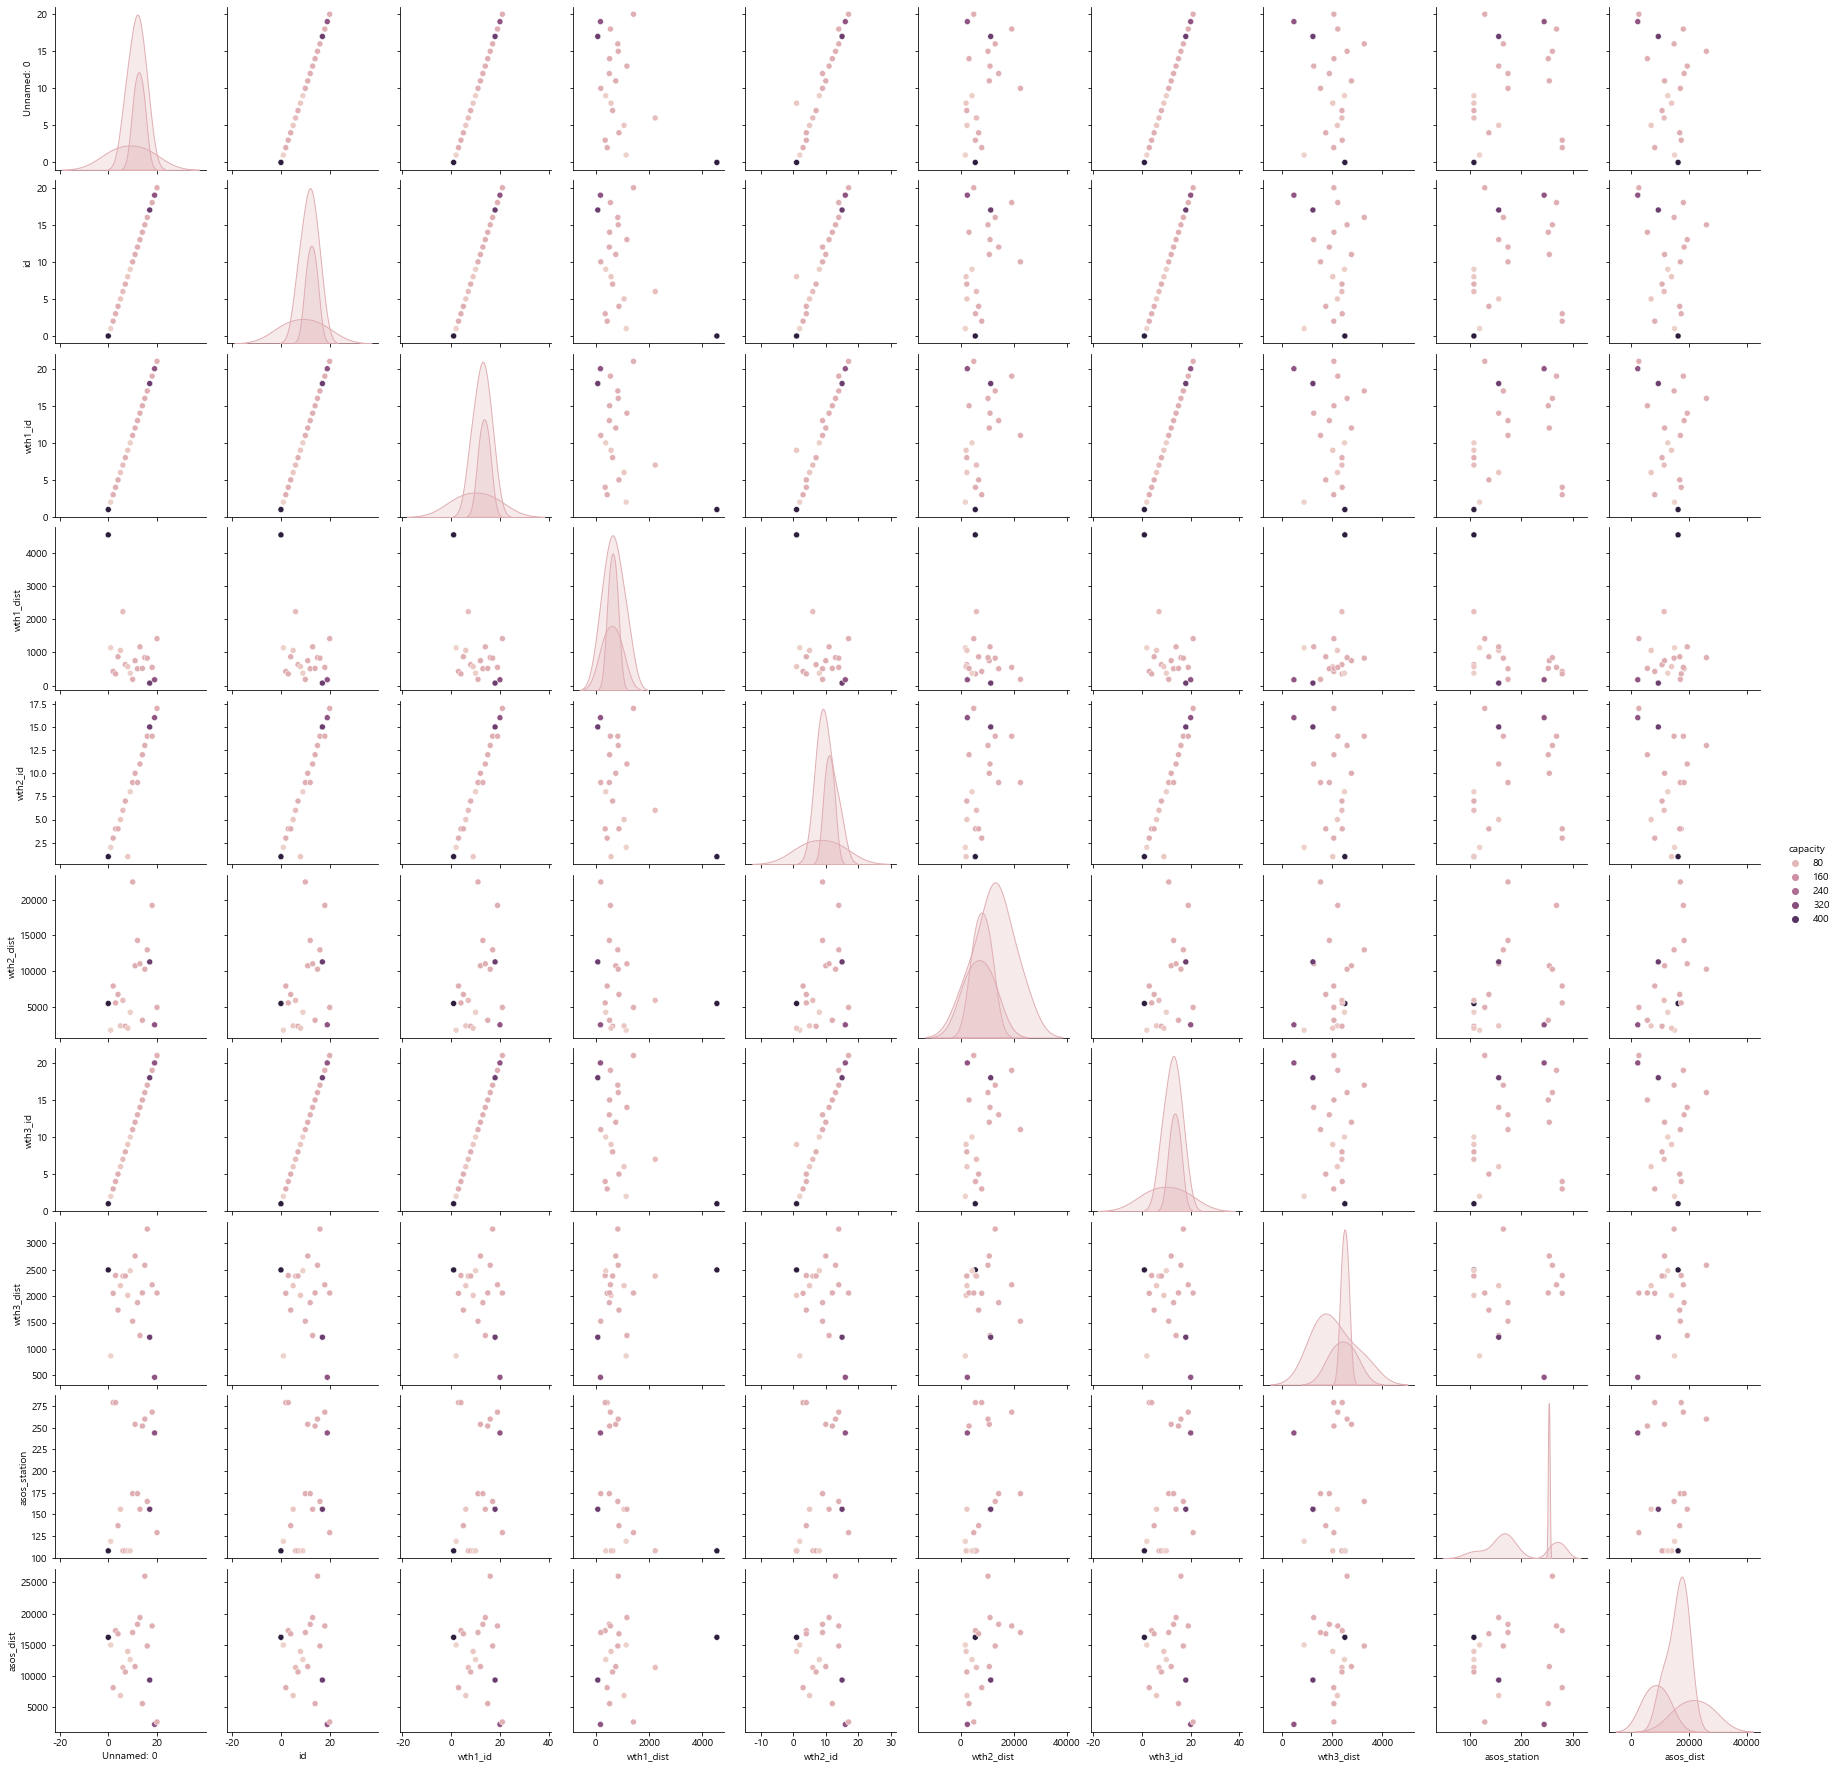

In [12]:
'''
pairplot: 인자로 전달되는 데이터프레임의 열(변수)을 두 개씩 짝 지을 수 있는 모든 조합에 대해서 표현
'''
sns.pairplot(df,hue='capacity') # hue: 색깔
plt.show()

#참고자료
#https://steadiness-193.tistory.com/198

In [ ]:
'''
boxplot
'''
iris = sns.load_dataset('iris')
iris['species'].unique()
#표현하고 싶은 컬럼 입력
data = [iris[iris['species']=="setosa"]['sepal_length'], 
        iris[iris['species']=="versicolor"]['sepal_length'],
        iris[iris['species']=="virginica"]['sepal_length']]
plt.boxplot(data, labels=['setosa', 'versicolor', 'virginica'], showmeans=True) # options: (vert = False/그래프 회전) 
plt.show()
#참고자료
#https://seaborn.pydata.org/generated/seaborn.boxplot.html

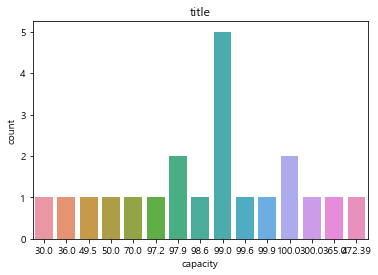

In [17]:
'''
countplot: 빈도 수 파악
사용법
1. 빈도 파악하기 원하는 컬럼 x에 대입
2. 데이터 프레임을 data에 대입
'''

sns.countplot(x="capacity", data=df) # x를 y로 변경하면 세로로 그래프 그림
#제목 설정
plt.title("title")
plt.show()

#참고자료
#https://steadiness-193.tistory.com/192